# Modeling dengan KNN Regression

#### Pengertian
**K-Nearest Neighbors (KNN) Regression** adalah metode regresi non-parametrik yang memprediksi nilai output berdasarkan kedekatan (jarak) dengan data lain dalam ruang fitur.  
Berbeda dengan model berbasis fungsi matematis, KNN tidak membuat asumsi bentuk hubungan antar variabel — melainkan menggunakan **data tetangga terdekat** untuk membuat prediksi.

In [23]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [42]:
def create_columns(lag=5): 
    columns = [] 
    for i in range(lag, lag - lag, -1): 
        columns.append("lag_" + str(i)) 
    columns.append("target") 
    return columns 

def create_supervised_data(data, lag=5): 
    data_supervised = [] 
    for i in range(lag, len(data)): 
        row = data[i-lag:i+1] 
        data_supervised.append(row) 
        columns = create_columns(lag) 
    
    supervised_df = pd.DataFrame(data_supervised, columns=columns) 
    return supervised_df

>Disini saya modeling dengan 6 dataset, data dengan lag_1 - lag_5, lag_10  
>lalu akan saya bandingkan akurasi setiap model  
>Saya normalisasi data dengan StandardScaler dari sklearn  

### Model dengan data Lag 1

In [43]:
supervised_df = pd.read_csv("no2_bojonegoro_post/supervised_data_lag_1.csv")

X = supervised_df[create_columns(1)]

# Normalisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
y = supervised_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model_lag1 = KNeighborsRegressor(n_neighbors=3)
model_lag1.fit(X_train, y_train)

score_lag1 = model_lag1.score(X_test, y_test)
score_lag1

0.9338947583074727

### Model dengan data Lag 2

In [44]:
supervised_df = pd.read_csv("no2_bojonegoro_post/supervised_data_lag_3.csv")

X = supervised_df[create_columns(2)]

# Normalisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
y = supervised_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model_lag2 = KNeighborsRegressor(n_neighbors=3)
model_lag2.fit(X_train, y_train)

score_lag2 = model_lag2.score(X_test, y_test)
score_lag2

0.8948978627438369

### Model dengan Lag 3

In [45]:
supervised_df = pd.read_csv("no2_bojonegoro_post/supervised_data_lag_3.csv")

X = supervised_df[create_columns(3)]

# Normalisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
y = supervised_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model_lag3 = KNeighborsRegressor(n_neighbors=3)
model_lag3.fit(X_train, y_train)

score_lag3 = model_lag3.score(X_test, y_test)
score_lag3

0.8246058667345897

### Model dengan Lag 4

In [46]:
supervised_df = pd.read_csv("no2_bojonegoro_post/supervised_data_lag_4.csv")

X = supervised_df[create_columns(4)]

# Normalisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
y = supervised_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model_lag4 = KNeighborsRegressor(n_neighbors=3)
model_lag4.fit(X_train, y_train)

score_lag4 = model_lag4.score(X_test, y_test)
score_lag4

0.7860610850049364

### Model dengan Lag 5

In [47]:
supervised_df = pd.read_csv("no2_bojonegoro_post/supervised_data_lag_5.csv")

X = supervised_df[create_columns(5)]

# Normalisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
y = supervised_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model_lag5 = KNeighborsRegressor(n_neighbors=3)
model_lag5.fit(X_train, y_train)

score_lag5 = model_lag5.score(X_test, y_test)
score_lag5

0.7976833188843817

### Model dengan Lag 10

In [48]:
supervised_df = pd.read_csv("no2_bojonegoro_post/supervised_data_lag_10.csv")

X = supervised_df[create_columns(10)]

# Normalisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
y = supervised_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model_lag10 = KNeighborsRegressor(n_neighbors=3)
model_lag10.fit(X_train, y_train)

score_lag10 = model_lag10.score(X_test, y_test)
score_lag10

0.5151059922703898

## Evalusi setiap model dengan lag berbeda

In [49]:
import matplotlib.pyplot as plt

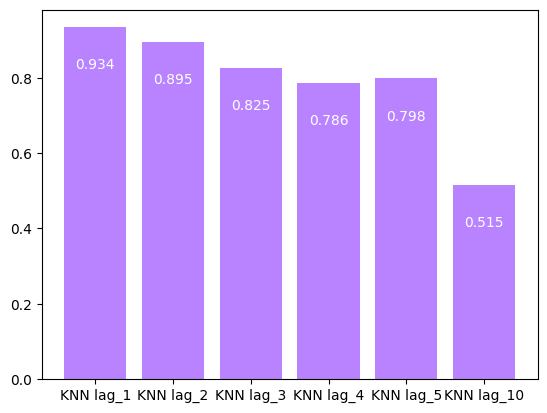

In [50]:
score = [score_lag1, score_lag2, score_lag3, score_lag4, score_lag5, score_lag10]
label = ["KNN lag_1", "KNN lag_2", "KNN lag_3", "KNN lag_4", "KNN lag_5", "KNN lag_10"]

plt.bar(label, score, color=["#b983ff"])

for i, v in enumerate(score):
    plt.text(i, v - 0.1, f"{v:.3}", va="center", ha="center", color="white", fontsize=10)

### Kesimpulan Hasil Evaluasi Model KNN Berdasarkan Lag

Grafik menunjukkan performa model **K-Nearest Neighbors (KNN)** dengan berbagai nilai *lag* (lag_1 hingga lag_5, dan lag_10).  
Nilai yang ditampilkan pada batang adalah **skor akurasi (atau koefisien determinasi/R²)** dari masing-masing model.

#### Analisis
- **KNN lag_1** memiliki performa terbaik dengan skor **0.934**, menunjukkan hubungan paling kuat antara fitur dan target ketika hanya menggunakan 1 lag sebelumnya.
- **KNN lag_2** sedikit menurun menjadi **0.895**, namun masih tergolong sangat baik.
- Setelah itu, performa terus menurun hingga **lag_4 (0.786)** dan **lag_5 (0.798)**.
- lalu paling rendah di lag_10 dengan **lag_10 (0.515)**

#### Kesimpulan
- Penggunaan **lag yang lebih besar tidak selalu meningkatkan performa model**.  
- Informasi dari data terbaru (lag_1 dan lag_2) lebih relevan dibanding data yang lebih lama.  
- Model **KNN dengan lag_1** merupakan konfigurasi **paling optimal** untuk dataset ini.
